In [1]:
#Importing Relevant Packages
##E1 - List the packages or libraries you have chosen for Python or R and justify how each item on the list supports the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Used for Data Visualizations
import matplotlib.ticker as mticker #Used to properly scale the axes in data plots
import seaborn as sns #Used for Data Visualizations
import statsmodels.api as sm #Used to create the Logistic Regression Model
from statsmodels.stats.outliers_influence import variance_inflation_factor #Used to check Variance Inflation Factor (VIF)
from sklearn.metrics import confusion_matrix #Used to create confusion Matrix
from sklearn.metrics import accuracy_score #Used to calculate the Accuracy attribute
from sklearn.model_selection import train_test_split #Used to split the datasets
from sklearn.model_selection import KFold #Used to cross-validate with Kfold

In [2]:
''' Part 1: Importing file and cleaning the dataset '''

' Part 1: Importing file and cleaning the dataset '

In [3]:
#Loading the dataset and making a copy to retain original dataset separately
file_path = 'C:/Users/bconn/OneDrive/Documents/WGUCoursework/7 - D600 - Statistical Data Mining/housing_information_dataset.csv'
data = pd.read_csv(file_path)
df = data.copy()

In [4]:
#Performing some initial profiling for reference
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [5]:
df.info()
## No null values noted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [6]:
##All data cleaning steps
#Renaming headers to python conventions
python_headers = ['id', 'price', 'square_footage', 'num_bathrooms', 'num_bedrooms', 'backyard_space', 'crime_rate', 'school_rating', 'age_of_home', 'distance_to_city_center', 'employment_rate', 'property_tax_rate', 'renovation_quality', 'local_amenities', 'transport_access', 'fireplace', 'house_color', 'garage', 'floors', 'windows', 'previous_sale_price', 'is_luxury']
df.columns = python_headers
#Rounding price and previous_sale_price to the nearest dollar and saving as int64
df['price'] = df['price'].round(1).astype('int64')
df['previous_sale_price'] = df['previous_sale_price'].round(1).astype('int64')
#Rounding bathroom to nearest half
def round_to_half(x):
    return round(x *2) / 2
df['num_bathrooms'] = [round_to_half(x) for x in df['num_bathrooms']]
#Changing the negative values for windows and previous_sale_price to their positive values, as negative values are impossible
df['windows'] = df['windows'].abs()
df['previous_sale_price'] = df['previous_sale_price'].abs()
#Remapping all Yes/No values to 1 and 0
bool_map = {"Yes" : 1, "No" : 0}
df['fireplace'] = df['fireplace'].map(bool_map).fillna(df['fireplace'])
df['garage'] = df['garage'].map(bool_map).fillna(df['garage'])

In [7]:
#Confirming data cleaning steps worked
df.info()
## Header format confirmed,fireplace and garage are now boolean values and saved as 1 and 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7000 non-null   int64  
 1   price                    7000 non-null   int64  
 2   square_footage           7000 non-null   float64
 3   num_bathrooms            7000 non-null   float64
 4   num_bedrooms             7000 non-null   int64  
 5   backyard_space           7000 non-null   float64
 6   crime_rate               7000 non-null   float64
 7   school_rating            7000 non-null   float64
 8   age_of_home              7000 non-null   float64
 9   distance_to_city_center  7000 non-null   float64
 10  employment_rate          7000 non-null   float64
 11  property_tax_rate        7000 non-null   float64
 12  renovation_quality       7000 non-null   float64
 13  local_amenities          7000 non-null   float64
 14  transport_access        

In [8]:
''' Part 2: Variable Description and Statistics Visualizations '''
#Utilizing luxury as the dependent variable, and  crime_rate, school_rating, backyard_space, local_amenities, fireplace, and garage as the independent variables
##C1 - Identify the dependent and all independent variables that are required to answer the research question and justify your selection of variables.

' Part 2: Variable Description and Statistics Visualizations '

In [9]:
#Variable Descriptions
## C2 - Describe the dependent variable and all independent variables from part C1 using descriptive statistics (counts, means, modes, ranges, min/max), including a screenshot of the descriptive statistics output for each of these variables.
print('Descriptive Statistics\n')
print('\nQuantitative Variables\n')#Showing Mean, Standard Deviation, and 5-number summaries
print('\nCrime Rate')
print(df['crime_rate'].describe())
print('\nSchool Rating')
print(df['school_rating'].describe())
print('\nBackyard Space')
print(df['backyard_space'].describe())
print('\nLocal Amenities')
print(df['local_amenities'].describe())
print('\n\nQualitative Variables\n')#Showing frequencies in descending order
print('Luxury') #Dependent Variable
print(df['is_luxury'].value_counts())
print('\nHas a Fireplace')
print(df['fireplace'].value_counts())
print('\nHas a Garage')
print(df['garage'].value_counts())

Descriptive Statistics


Quantitative Variables


Crime Rate
count    7000.000000
mean       31.226194
std        18.025327
min         0.030000
25%        17.390000
50%        30.385000
75%        43.670000
max        99.730000
Name: crime_rate, dtype: float64

School Rating
count    7000.000000
mean        6.942923
std         1.888148
min         0.220000
25%         5.650000
50%         7.010000
75%         8.360000
max        10.000000
Name: school_rating, dtype: float64

Backyard Space
count    7000.000000
mean      511.507029
std       279.926549
min         0.390000
25%       300.995000
50%       495.965000
75%       704.012500
max      1631.360000
Name: backyard_space, dtype: float64

Local Amenities
count    7000.000000
mean        5.934579
std         2.657930
min         0.000000
25%         4.000000
50%         6.040000
75%         8.050000
max        10.000000
Name: local_amenities, dtype: float64


Qualitative Variables

Luxury
is_luxury
1    3528
0    3472
Name: count, 

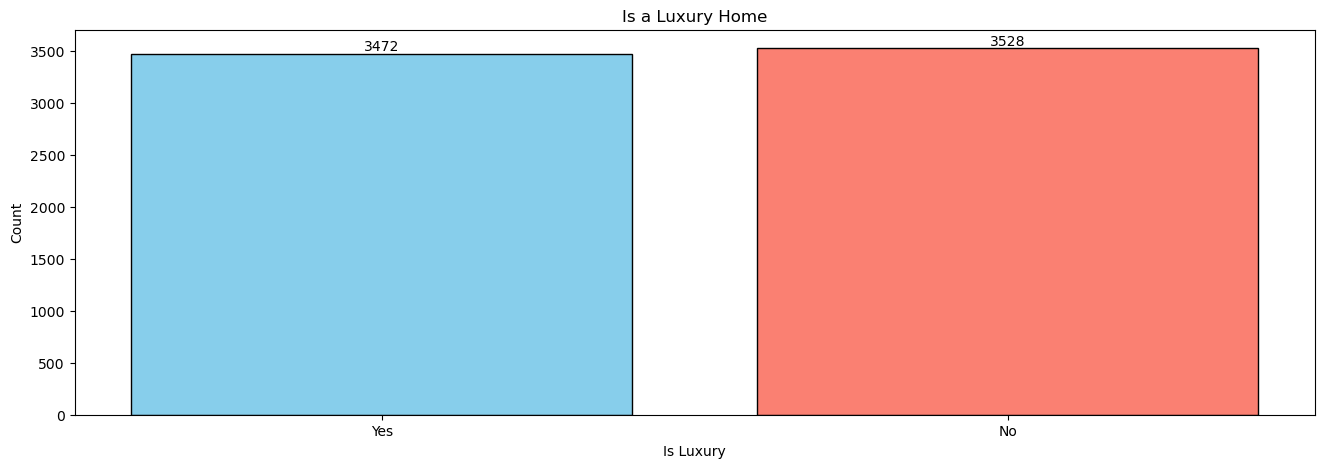

In [10]:
#Visualizations
## C3 - Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables from part C1, including the dependent variable in the bivariate visualizations.

#Luxury - Dependant Variable
##Univariate Analysis
plt.figure(figsize = [16,5])
plt.title("Is a Luxury Home")
counts = df['is_luxury'].value_counts()
categories = ['Yes', 'No']
counts = counts.sort_index()
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'], edgecolor='black')
for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, 
             f'{int(yval)}', ha='center', va='bottom')
plt.xlabel("Is Luxury")
plt.ylabel("Count");

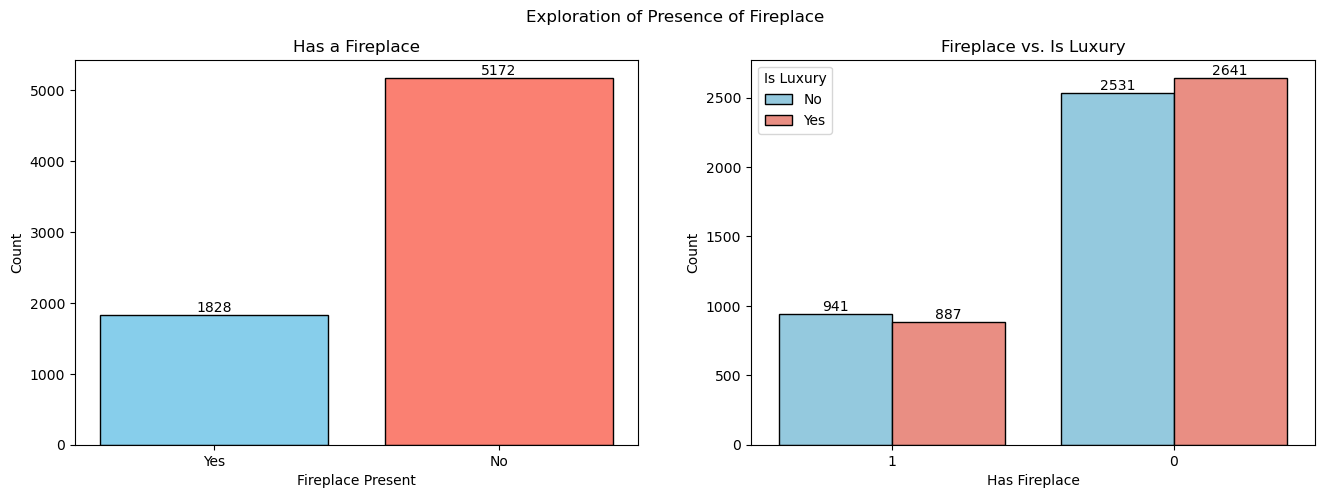

In [11]:
#Has a Fireplace - Independent Variable
##Univariate and Bivariate Analysis
plt.figure(figsize=[16,5])
plt.suptitle("Exploration of Presence of Fireplace")

# Left Plot: Univariate Analysis of fireplace
plt.subplot(1, 2, 1)
plt.title("Has a Fireplace")
counts = df['fireplace'].value_counts()
categories = ['Yes', 'No'] 
counts = counts.sort_index(ascending=False) 
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'], edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, 
             f'{int(yval)}', ha='center', va='bottom')
plt.xlabel("Fireplace Present")
plt.ylabel("Count")

# Right Plot: Bivariate Analysis of fireplace vs is_luxury
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x="fireplace", hue="is_luxury", 
                   palette=["skyblue", "salmon"], edgecolor='black', 
                   order=[1, 0]) 
for bar in ax.patches:
    height = bar.get_height()
    if height > 0: 
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2,  
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.xlabel("Has Fireplace")
plt.ylabel("Count")
plt.title("Fireplace vs. Is Luxury")
plt.legend(title="Is Luxury", labels=["No", "Yes"]) 

plt.show();

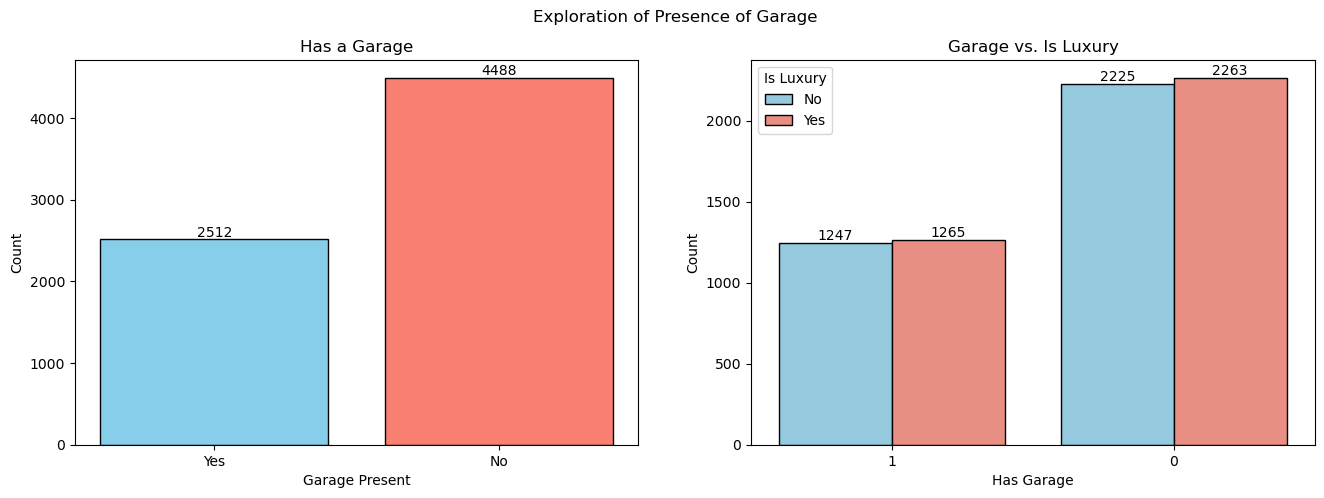

In [12]:
#Has a Garage - Independent Variable
##Univariate and Bivariate Analysis
plt.figure(figsize=[16,5])
plt.suptitle("Exploration of Presence of Garage")

# Left Plot: Univariate Analysis of Garage
plt.subplot(1, 2, 1)
plt.title("Has a Garage")
counts = df['garage'].value_counts()
categories = ['Yes', 'No'] 
counts = counts.sort_index(ascending=False) 
bars = plt.bar(categories, counts, color=['skyblue', 'salmon'], edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, 
             f'{int(yval)}', ha='center', va='bottom')
plt.xlabel("Garage Present")
plt.ylabel("Count")

# Right Plot: Bivariate Analysis of garage vs is_luxury
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x="garage", hue="is_luxury", 
                   palette=["skyblue", "salmon"], edgecolor='black', 
                   order=[1, 0]) 
for bar in ax.patches:
    height = bar.get_height()
    if height > 0: 
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2,  
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.xlabel("Has Garage")
plt.ylabel("Count")
plt.title("Garage vs. Is Luxury")
plt.legend(title="Is Luxury", labels=["No", "Yes"]) 

plt.show();

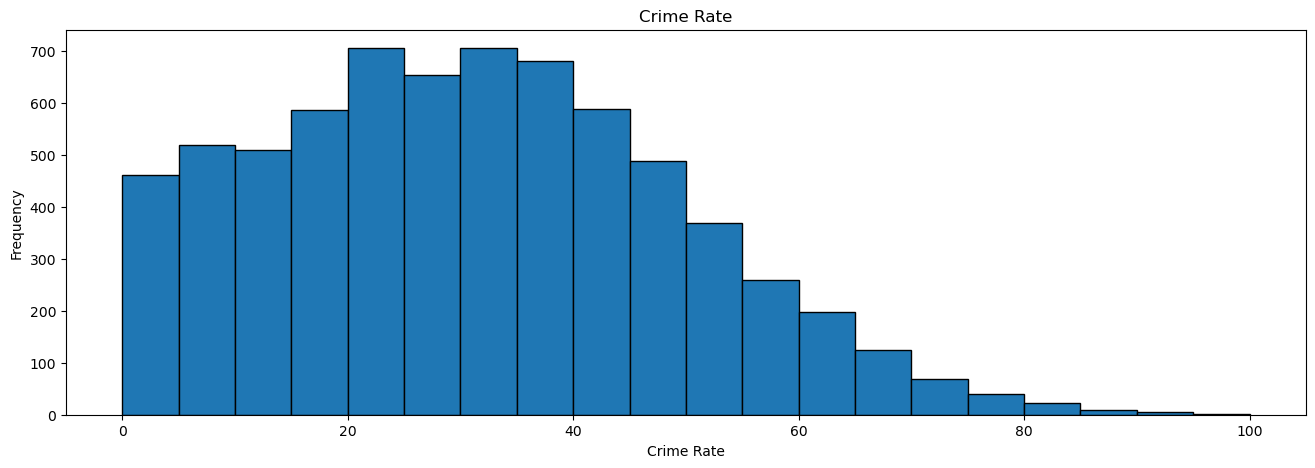

In [13]:
#Crime Rate - Independent Variable
##Univariate exploration of crime_rate
plt.figure(figsize = [16,5])
plt.title("Crime Rate")
bins = np.arange(0, 105, 5)
plt.hist(data=df, x='crime_rate', bins=bins, edgecolor='black', density=False)
plt.xlabel("Crime Rate")
plt.ylabel("Frequency");

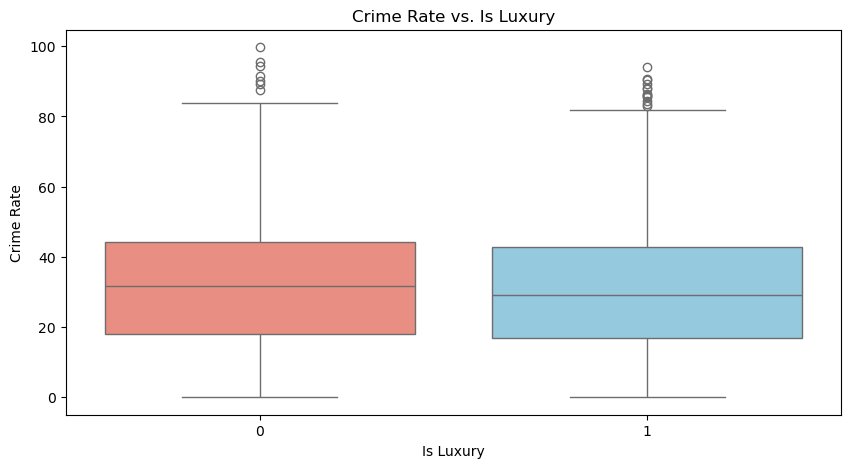

In [14]:
#Crime Rate - Independent Variable
##Bivariate exploration of crime_rate vs is_luxury
plt.figure(figsize = [10,5])
plt.title("Crime Rate vs. Is Luxury")
ax = sns.boxplot(data=df, x="is_luxury", y="crime_rate",  hue="is_luxury", palette=['salmon', 'skyblue'],legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Is Luxury")
plt.ylabel("Crime Rate");


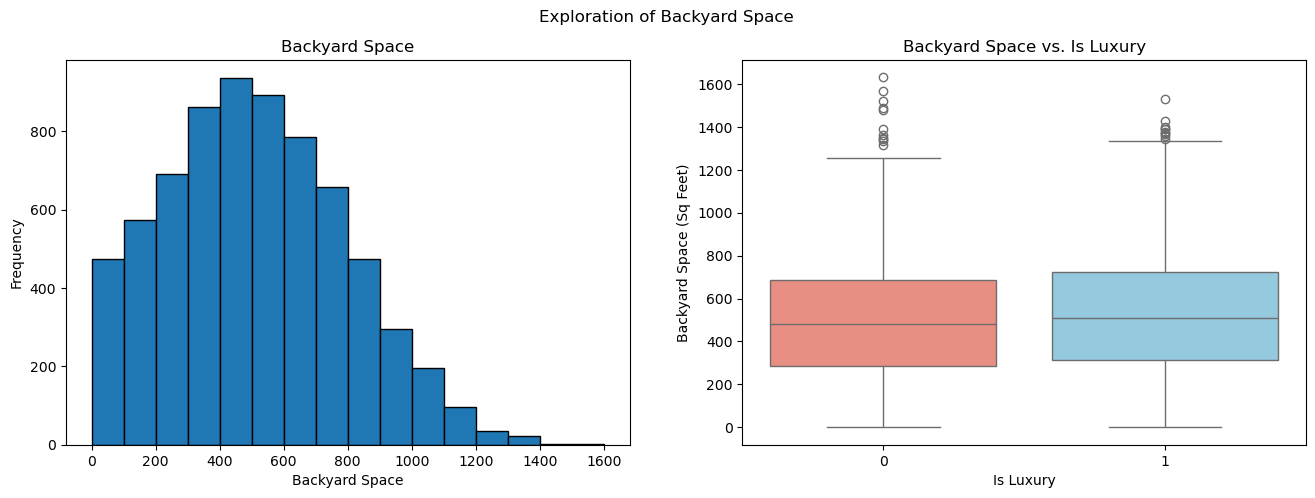

In [15]:
#Backyard Space - Independent Variable
##Univariate and Bivariate Analysis
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Backyard Space")

#Left Plot: Univariate exploration of backyard_space
plt.subplot (1, 2, 1)
plt.title("Backyard Space")
bins = np.arange(0, 1650, 100)
plt.hist(data=df, x='backyard_space', bins=bins, edgecolor='black', density=False)
plt.xlabel("Backyard Space")
plt.ylabel("Frequency")

#Right Plot: Bivariate exploration of backyard_space vs is_luxury
plt.subplot(1, 2, 2)
plt.title("Backyard Space vs. Is Luxury")
ax = sns.boxplot(data=df, x="is_luxury", y="backyard_space",  hue="is_luxury", palette=['salmon', 'skyblue'], legend=False)
plt.xlabel("Is Luxury")
plt.ylabel("Backyard Space (Sq Feet)");



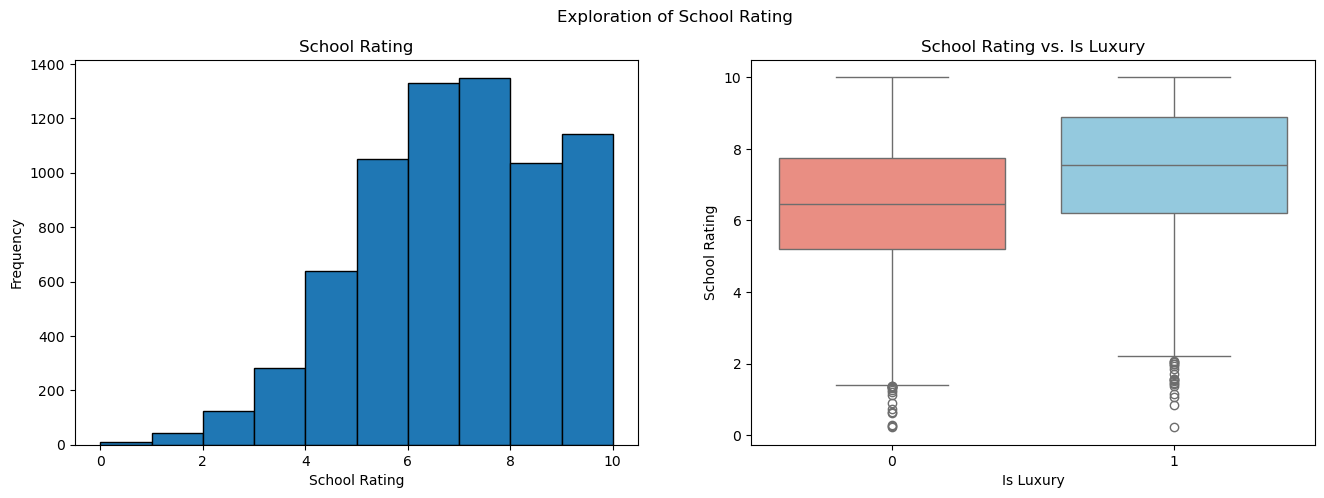

In [16]:
#School Rating - Independent Variable
##Univariate exploration of school_rating
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of School Rating")

#Left Plot: Univariate Exploration of School Rating
plt.subplot(1, 2, 1)
plt.title("School Rating")
bins = np.arange(0, 11, 1)
plt.hist(data=df, x='school_rating', bins=bins, edgecolor='black', density=False)
plt.xlabel("School Rating")
plt.ylabel("Frequency")

##Bivariate exploration of school_rating vs is_luxury
plt.subplot(1, 2, 2)
plt.title("School Rating vs. Is Luxury")
ax = sns.boxplot(data=df, x="is_luxury", y="school_rating",  hue="is_luxury", palette=['salmon', 'skyblue'],legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Is Luxury")
plt.ylabel("School Rating");

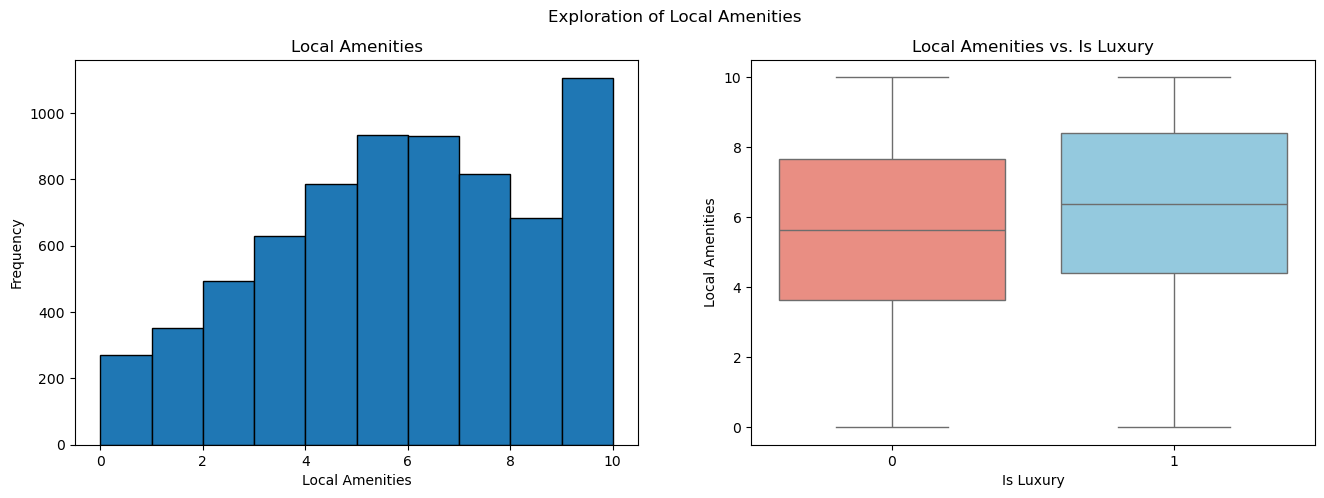

In [17]:
#Local Amenities - Independent Variable
##Univariate exploration of local_amenities
plt.figure(figsize = [16,5])
plt.suptitle("Exploration of Local Amenities")

#Left Plot: Univariate Exploration of Local Amenities
plt.subplot(1, 2, 1)
plt.title("Local Amenities")
bins = np.arange(0, 11, 1)
plt.hist(data=df, x='local_amenities', bins=bins, edgecolor='black', density=False)
plt.xlabel("Local Amenities")
plt.ylabel("Frequency")

##Bivariate exploration of local_amenities vs is_luxury
plt.subplot(1, 2, 2)
plt.title("Local Amenities vs. Is Luxury")
ax = sns.boxplot(data=df, x="is_luxury", y="local_amenities",  hue="is_luxury", palette=['salmon', 'skyblue'],legend=False)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Is Luxury")
plt.ylabel("Local Amenities");

In [18]:
''' Part 3: Model creation and optimization '''

' Part 3: Model creation and optimization '

In [19]:
#Splitting the Dataset into Test and Training
## D1 - Split the data into two datasets, with a larger percentage assigned to the training dataset and a smaller percentage assigned to the test data set. Provide the files.
y = df.is_luxury
X = df[['crime_rate', 'school_rating', 'backyard_space', 'local_amenities', 'fireplace', 'garage']].assign(const=1)

#Splitting the Dataset into a Test and Training dataset with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_frame() #Converting to dataframe for ease in exporting
y_test = y_test.to_frame()
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")
print(f"Training labels: {y_train.shape}, Testing labels: {y_test.shape}")

Training data: (5600, 7), Testing data: (1400, 7)
Training labels: (5600, 1), Testing labels: (1400, 1)


In [20]:
#Combining the datasets for exporting
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [21]:
#Exporting the Test & Train Datasets to share
train_data.to_csv("training_data", index=False)
test_data.to_csv("test_data", index=False)

In [22]:
#Initial Logistic Regression Model
##D2 -  Use the training dataset to create and perform a regression model using regression as a statistical method. Optimize the regression model using a process of your selection. 
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.653471
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              is_luxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5593
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                 0.05713
Time:                        21:10:34   Log-Likelihood:                -3659.4
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust   LLR p-value:                 1.231e-92
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
crime_rate          0.0020      0.002      1.273      0.203      -0.001       0.005
school_rating 

In [23]:
 #Backwards Stepwise Elimination
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary())

def backward_elimination(X, y, threshold=0.05): ##Initiating Loop to remove variables based upon p-values
    while True:
        model = sm.Logit(y, X).fit(disp=0) 
        p_values = model.pvalues  
        max_p = p_values.max()
        if max_p > threshold:  
            feature_to_remove = p_values.idxmax() 
            print(f"Removing '{feature_to_remove}' with p-value {max_p:.4f}") 
            X = X.drop(columns=[feature_to_remove]) 
        else:
            break  
    
    return X, model

X_train_reduced, final_model = backward_elimination(X_train, y_train)
print(final_model.summary())
#Printing the AIC and BIC Manually
print(f"\nAIC: {final_model.aic:.4f}")
print(f"BIC: {final_model.bic:.4f}")


Optimization terminated successfully.
         Current function value: 0.653471
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              is_luxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5593
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                 0.05713
Time:                        21:10:34   Log-Likelihood:                -3659.4
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust   LLR p-value:                 1.231e-92
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
crime_rate          0.0020      0.002      1.273      0.203      -0.001       0.005
school_rating 

In [24]:
#Confusion Matrix - Training Dataset
## D3 - Give the confusion matrix and accuracy of the optimized model used on the training set.

y_train_pred = (logit_model.predict(X_train) >= 0.5).astype(int)

##Putting into a Dataframe for cleaner visualization
cm = confusion_matrix(y_train, y_train_pred)
cm_training_df = pd.DataFrame(cm, 
                     index=["Actual: No (0)", "Actual: Yes (1)"], 
                     columns=["Predicted: No (0)", "Predicted: Yes (1)"])

print(cm_training_df)

#Computing Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nAccuracy: {accuracy:.4f}") 

                 Predicted: No (0)  Predicted: Yes (1)
Actual: No (0)                1648                1117
Actual: Yes (1)               1024                1811

Accuracy: 0.6177


In [25]:
print(y_train.shape)  # Should match y_pred.shape
print(y_train_pred.shape)

(5600, 1)
(5600,)


In [26]:
''' Part 4: Results and Recommendations '''
#Running Optimized Model on Test dataset
## D4 - Run the prediction on the test dataset using the optimized regression model

X_test_trimmed = X_test[["school_rating", "backyard_space", "local_amenities"]] #Select only the relevant variables found from training
logit_model = sm.Logit(y_test, X_test_trimmed).fit()
print(logit_model.summary())

# Print AIC and BIC manually
print(f"\nAIC: {logit_model.aic:.4f}")
print(f"BIC: {logit_model.bic:.4f}")

Optimization terminated successfully.
         Current function value: 0.689348
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              is_luxury   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1397
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                0.005410
Time:                        21:10:34   Log-Likelihood:                -965.09
converged:                       True   LL-Null:                       -970.34
Covariance Type:            nonrobust   LLR p-value:                  0.005250
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
school_rating       0.0546      0.019      2.886      0.004       0.018       0.092
backyard_space

In [27]:
#Confusion Matrix for Test Dataset
y_test_pred = (logit_model.predict(X_test_trimmed) >= 0.5).astype(int)

##Putting into a Dataframe for cleaner visualization
cm = confusion_matrix(y_test, y_test_pred)
cm_test_df = pd.DataFrame(cm, 
                     index=["Actual: No (0)", "Actual: Yes (1)"], 
                     columns=["Predicted: No (0)", "Predicted: Yes (1)"])

print(cm_test_df)

#Computing Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy: {accuracy:.4f}") 

                 Predicted: No (0)  Predicted: Yes (1)
Actual: No (0)                 194                 513
Actual: Yes (1)                130                 563

Accuracy: 0.5407


In [28]:
#Cross-Validating data to solve for potential overfitting
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    #Fit statsmodels' logistic regression
    logit_model = sm.Logit(y_train_cv, X_train_cv).fit(disp=0) 

    #Predict on the validation fold
    y_pred_cv = (logit_model.predict(X_test_cv) >= 0.5).astype(int)
    accuracy = accuracy_score(y_test_cv, y_pred_cv)
    cv_accuracies.append(accuracy)
print(f"Cross-validation accuracy: {np.mean(cv_accuracies):.4f} ± {np.std(cv_accuracies):.4f}")
##62% accuracy indicates the model is not overfitting significantly, nor is it generalizing perfectly.

Cross-validation accuracy: 0.6170 ± 0.0044


In [29]:
#Verification of Logistic Regression Assumptions
## E4: Summarize at least four assumptions of logistic regression. 
## E5: Provide evidence that the assumptions from part E4 were verified by providing either a code snippet or a screenshot.

#Demonstrating the Dependent Variable is Categorical
df['is_luxury'].value_counts()
## All values are 1 or 0

is_luxury
1    3528
0    3472
Name: count, dtype: int64

In [30]:
#Demonstrating the Dataset has a sufficient sample size
df.shape
## 7000 Records is well above the lower threshold for this to be an issue

(7000, 22)

In [31]:
#Checking for Multicolinnearity with a Correlation Matrix
independent_variables = df[["school_rating", "backyard_space", "local_amenities"]]
corr_matrix = independent_variables.corr()

print(corr_matrix)
## No variables are at or approaching 1

                 school_rating  backyard_space  local_amenities
school_rating         1.000000        0.047320         0.138622
backyard_space        0.047320        1.000000         0.046857
local_amenities       0.138622        0.046857         1.000000


In [32]:
#Confirming lack of Multicollinearity with Variance Inflation Factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)
## No values greater than 1 indicate low levels of multicollinearity

           Feature        VIF
0       crime_rate   1.038513
1    school_rating   1.057134
2   backyard_space   1.006620
3  local_amenities   1.022715
4        fireplace   1.001304
5           garage   1.001031
6            const  27.665474


In [33]:
# Checking for duplicate rows in the dataset
duplicated_values = df.duplicated().sum()
print(duplicated_values)
## No duplicated values indicate all rows are independent of one another

0
